In [2]:
!pip install pandas
!pip install sklearn
!pip install matplotlib
!pip install seaborn

  Using cached pandas-1.4.2-cp39-cp39-win_amd64.whl (10.5 MB)
  Using cached numpy-1.22.3-cp39-cp39-win_amd64.whl (14.7 MB)
  Using cached pytz-2022.1-py2.py3-none-any.whl (503 kB)


In [60]:
import pandas as pd
df=pd.read_csv('bikedata.csv')
df.head()

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN
1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,NaN


In [61]:
df.shape

(1061, 7)

In [62]:
df.describe()

,selling_price,year,km_driven,ex_showroom_price
count,1061.000000,1061.000000,1061.000000,6.260000e+02
mean,59638.151744,2013.867107,34359.833176,8.795871e+04
std,56304.291973,4.301191,51623.152702,7.749659e+04
min,5000.000000,1988.000000,350.000000,3.049000e+04
25%,28000.000000,2011.000000,13500.000000,5.485200e+04
50%,45000.000000,2015.000000,25000.000000,7.275250e+04
75%,70000.000000,2017.000000,43000.000000,8.703150e+04
max,760000.000000,2020.000000,880000.000000,1.278000e+06


In [63]:
df.isnull().sum()

name                   0
selling_price          0
year                   0
seller_type            0
owner                  0
km_driven              0
ex_showroom_price    435
dtype: int64

In [64]:
round((435/1061)*100,2)

41.0

In [65]:
df['ex_showroom_price'].mean()

87958.71405750798

In [66]:
df['ex_showroom_price'].median()

72752.5

In [67]:
df['ex_showroom_price'].max()

1278000.0

In [68]:
df['ex_showroom_price'].min()

30490.0

C:\Users\gurma\anaconda3\envs\bikesalesprediction\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='ex_showroom_price', ylabel='Density'>

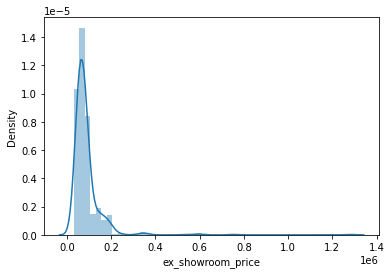

In [69]:
import matplotlib.pyplot as plt
import seaborn as sb
sb.distplot(df['ex_showroom_price'])
#plt.plot(df['ex_showroom_price'])

In [70]:
df['owner'].value_counts()

1st owner    924
2nd owner    123
3rd owner     11
4th owner      3
Name: owner, dtype: int64

In [71]:
df.head()

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN
1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,NaN


In [72]:
df['seller_type'].value_counts()

Individual    1055
Dealer           6
Name: seller_type, dtype: int64

In [73]:
df['name'].value_counts()

Bajaj Pulsar 150                 41
Royal Enfield Classic 350        27
Honda Activa [2000-2015]         23
Honda CB Hornet 160R             22
Bajaj Pulsar 180                 20
                                 ..
Hero Honda CD100SS                1
Royal Enfield Thunderbird 500     1
BMW G310GS                        1
TVS Radeon                        1
Bajaj  ct 100                     1
Name: name, Length: 279, dtype: int64

In [74]:
def bike_model(model_name, excl_honda_hero=False):
    model_list = []
    if excl_honda_hero:
        for i in df['name']:
            if model_name in i and 'Hero' not in i:
                model_list.append(i)
        return model_list
    else:
        for i in df['name']:
            if model_name in i:
                model_list.append(i)
        return model_list

In [75]:
royal_enfield = bike_model('Royal Enfield')
honda = bike_model('Honda',excl_honda_hero=True)
bajaj = bike_model('Bajaj')
yamaha = bike_model('Yamaha')
suzuki = bike_model('Suzuki')
hero = bike_model('Hero')
tvs = bike_model('TVS')
ktm = bike_model('KTM')

In [76]:
def brand(i):
    if i in royal_enfield:
        return 'Royal Enfield'
    elif i in honda:
        return 'Honda'
    elif i in bajaj:
        return 'Bajaj'
    elif i in yamaha:
        return 'Yamaha'
    elif i in hero:
        return 'Hero'    
    elif i in tvs:
        return 'TVS'    
    elif i in suzuki:
        return 'Suzuki'  
    elif i in ktm:
        return 'KTM' 
    else:
        return 'Other'

In [77]:
df['brand'] = df['name'].apply(lambda x:brand(x))
df.head()

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price,brand
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN,Royal Enfield
1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN,Honda
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0,Royal Enfield
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0,Yamaha
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,NaN,Yamaha


In [78]:
df=df.drop(['name'],axis=1)

In [79]:
df['ex_showroom_price'].fillna(df['ex_showroom_price'].median(),inplace=True)

In [80]:
df.head()

,selling_price,year,seller_type,owner,km_driven,ex_showroom_price,brand
0,175000,2019,Individual,1st owner,350,72752.5,Royal Enfield
1,45000,2017,Individual,1st owner,5650,72752.5,Honda
2,150000,2018,Individual,1st owner,12000,148114.0,Royal Enfield
3,65000,2015,Individual,1st owner,23000,89643.0,Yamaha
4,20000,2011,Individual,2nd owner,21000,72752.5,Yamaha


In [81]:
present_year = 2022
model_age=[]
for years in df['year']:
    age=present_year-years
    model_age.append(age)
df['Model_age'] =model_age


In [82]:
df=df.drop(['year'], axis=1)
df.head()

,selling_price,seller_type,owner,km_driven,ex_showroom_price,brand,Model_age
0,175000,Individual,1st owner,350,72752.5,Royal Enfield,3
1,45000,Individual,1st owner,5650,72752.5,Honda,5
2,150000,Individual,1st owner,12000,148114.0,Royal Enfield,4
3,65000,Individual,1st owner,23000,89643.0,Yamaha,7
4,20000,Individual,2nd owner,21000,72752.5,Yamaha,11


# Dealing with categorical variables using One-hot encoding 

In [83]:
df=pd.get_dummies(df,columns=['seller_type','owner','brand'],drop_first=True)

In [84]:
df.head()

,selling_price,km_driven,ex_showroom_price,Model_age,seller_type_Individual,owner_2nd owner,owner_3rd owner,owner_4th owner,brand_Hero,brand_Honda,brand_KTM,brand_Other,brand_Royal Enfield,brand_Suzuki,brand_TVS,brand_Yamaha
0,175000,350,72752.5,3,1,0,0,0,0,0,0,0,1,0,0,0
1,45000,5650,72752.5,5,1,0,0,0,0,1,0,0,0,0,0,0
2,150000,12000,148114.0,4,1,0,0,0,0,0,0,0,1,0,0,0
3,65000,23000,89643.0,7,1,0,0,0,0,0,0,0,0,0,0,1
4,20000,21000,72752.5,11,1,1,0,0,0,0,0,0,0,0,0,1


In [85]:
df.columns

Index(['selling_price', 'km_driven', 'ex_showroom_price', 'Model_age',
       'seller_type_Individual', 'owner_2nd owner', 'owner_3rd owner',
       'owner_4th owner', 'brand_Hero', 'brand_Honda', 'brand_KTM',
       'brand_Other', 'brand_Royal Enfield', 'brand_Suzuki', 'brand_TVS',
       'brand_Yamaha'],
      dtype='object')

In [86]:
X= df.iloc[:,1:]
Y=df.iloc[:,0]

In [87]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.3,random_state=25)

In [88]:
X_train.shape

(742, 15)

In [89]:
Y_test.shape

(319,)

In [90]:
X_test.head()

,km_driven,ex_showroom_price,Model_age,seller_type_Individual,owner_2nd owner,owner_3rd owner,owner_4th owner,brand_Hero,brand_Honda,brand_KTM,brand_Other,brand_Royal Enfield,brand_Suzuki,brand_TVS,brand_Yamaha
409,25000,181445.0,5,1,0,0,0,0,0,0,0,1,0,0,0
21,17450,44389.0,6,1,0,0,0,0,1,0,0,0,0,0,0
16,27000,72752.5,16,1,0,0,0,1,0,0,0,0,0,0,0
763,28000,72752.5,10,1,0,0,0,0,0,0,0,0,0,0,0
891,14000,148114.0,4,1,0,0,0,0,0,0,0,1,0,0,0


In [100]:
X_test.columns

Index(['km_driven', 'ex_showroom_price', 'Model_age', 'seller_type_Individual',
       'owner_2nd owner', 'owner_3rd owner', 'owner_4th owner', 'brand_Hero',
       'brand_Honda', 'brand_KTM', 'brand_Other', 'brand_Royal Enfield',
       'brand_Suzuki', 'brand_TVS', 'brand_Yamaha'],
      dtype='object')

In [91]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()

In [92]:
#Working with Hyperparameters
import numpy as np
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
print(n_estimators)

[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200]


In [93]:
from sklearn.model_selection import RandomizedSearchCV

#Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [94]:
#Create the random grid

random_grid = {'n_estimators':n_estimators,
              'max_features':max_features,
              'max_depth':max_depth,
              'min_samples_split':min_samples_split,
              'min_samples_leaf':min_samples_leaf}
print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [95]:
#Use random grid to search for hyperparameters
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,scoring='neg_mean_squared_error',
                               n_iter = 10, cv = 5, verbose=2, random_state=42,n_jobs=1)
rf_random.fit(X_train,Y_train)


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.9s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   3.3s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.6s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.3s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.6s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   2.9s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   3.3s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [96]:
prediction_latest = rf_random.predict(X_test)
prediction_latest

array([131064.82256793,  35817.19391612,  17636.7548433 ,  32154.72097978,
       138486.64861126,  14706.10150537,  66791.85883096,  46573.64432546,
        42374.65065792,  50905.36319737,  32999.48468349,  27072.10148247,
        14908.46258343,  90283.04444666,  24610.17005805,  41371.20833623,
        30764.02375061,  15283.01408919,  37274.39802271,  26059.8212433 ,
        48050.51091949,  87100.51736614,  41496.13578971,  31067.78624364,
        69214.8563062 ,  32343.17256973,  34829.01862129, 188948.59929699,
        62798.78568193,  24757.48725042,  32695.00529838,  66938.64861635,
        46220.22578163,  45420.69823821, 139927.2262845 ,  30802.47824888,
        41199.67971278, 204486.88034101,  13734.71659468,  28633.48856118,
       128481.1291837 ,  52515.99366296,  33853.15853088,  42062.54281268,
        40494.25830948,  47547.07740245,  42088.21538931,  54448.06154729,
        37130.93460134,  90283.04444666, 137893.59438058,  19007.18522409,
        21549.63153765,  

In [97]:
from sklearn import metrics
print("MAE:", metrics.mean_absolute_error(Y_test,prediction_latest))
print("MSE:", metrics.mean_squared_error(Y_test,prediction_latest))
print("RMSE:",np.sqrt(metrics.mean_squared_error(Y_test, prediction_latest)))

MAE: 11735.736562002923
MSE: 352736039.0174543
RMSE: 18781.268301620483


In [98]:
import pickle
file = open('random_forest_regressor_model.pkl','wb')

#dump information to that file
pickle.dump(rf_random,file)
file.close()